In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving companies1.csv to companies1.csv


In [3]:
df = pd.read_csv('companies1.csv')
df.head()

,company_id,average_rating,num_review,num_employee,number,workers,final
0,kms-technology,4.0,201,1000,12,1762,1
1,nab-in-collaboration-with-positive-thinking-co...,4.4,202,56,43,1786,0
2,robert-bosch-engineering-and-business-solutions,3.2,203,62,6,3456,0
3,gft-technologies-vietnam,5.1,204,78,4,9,0
4,tyme,4.6,205,52,9,526,0


In [4]:
dfs = df.copy()
col_names = ['num_review','num_employee','number','workers']
features = dfs[col_names]

In [5]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

In [6]:
dfs[col_names] = scaler.fit_transform(features.values)
dfs

,company_id,average_rating,num_review,num_employee,number,workers,final
0,kms-technology,4.0,0.650485,0.902527,0.001840,0.018269,1
1,nab-in-collaboration-with-positive-thinking-co...,4.4,0.653722,0.050542,0.006592,0.018518,0
2,robert-bosch-engineering-and-business-solutions,3.2,0.656958,0.055957,0.000920,0.035833,0
3,gft-technologies-vietnam,5.1,0.660194,0.070397,0.000613,0.000093,0
4,tyme,4.6,0.663430,0.046931,0.001380,0.005454,0
...,...,...,...,...,...,...,...
104,ghn,3.0,0.987055,0.996390,0.009198,0.818926,1
105,nal-viet-nam-nal-global-career,4.3,0.990291,0.997292,0.012264,0.818937,1
106,waverley-software,9.0,0.993528,0.998195,0.013797,0.818947,1
107,infodation-vietnam,5.0,0.996764,0.999097,0.006899,0.818958,1


In [7]:
X = dfs.iloc[:,[2,3,4,5]].values

In [8]:
y = dfs.iloc[:, -1].values 

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [10]:
X_train

array([[9.93527508e-01, 9.98194946e-01, 1.37973325e-02, 8.18947194e-01],
       [9.96763754e-01, 9.99097473e-01, 6.89866626e-03, 8.18957562e-01],
       [8.73786408e-01, 9.64801444e-01, 7.05196995e-02, 8.18065881e-03],
       [9.09385113e-01, 9.74729242e-01, 9.55082017e-02, 3.33343702e-02],
       [7.15210356e-01, 2.88808664e-02, 1.50237621e-02, 3.31788443e-04],
       [9.80582524e-01, 9.94584838e-01, 3.06607389e-03, 8.18905720e-01],
       [8.83495146e-01, 9.67509025e-01, 4.92718075e-01, 8.81313053e-04],
       [8.99676375e-01, 9.72021661e-01, 9.50482907e-03, 6.78092631e-03],
       [7.31391586e-01, 3.24909747e-02, 9.96474015e-03, 8.08734331e-04],
       [7.70226537e-01, 6.76895307e-02, 9.81143646e-03, 8.18065881e-03],
       [9.12621359e-01, 9.75631769e-01, 6.89866626e-03, 5.74408743e-03],
       [9.57928803e-01, 9.88267148e-01, 3.95523532e-02, 8.18833142e-01],
       [7.99352751e-01, 1.26353791e-02, 1.83964434e-03, 4.87314276e-04],
       [9.67637540e-01, 9.90974729e-01, 1.19576882e

In [11]:
y_train

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [14]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 217 ms, sys: 50.7 ms, total: 268 ms
Wall time: 292 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [16]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [17]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [20]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 3.18 s, sys: 204 ms, total: 3.38 s
Wall time: 2min 6s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [21]:
grid_search.best_score_

1.0

In [22]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [23]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
X

array([[6.50485437e-01, 9.02527076e-01, 1.83964434e-03, 1.82691012e-02],
       [6.53721683e-01, 5.05415162e-02, 6.59205887e-03, 1.85179425e-02],
       [6.56957929e-01, 5.59566787e-02, 9.19822168e-04, 3.58331519e-02],
       [6.60194175e-01, 7.03971119e-02, 6.13214778e-04, 9.33154997e-05],
       [6.63430421e-01, 4.69314079e-02, 1.37973325e-03, 5.45377254e-03],
       [6.66666667e-01, 5.59566787e-02, 1.83964434e-03, 3.36661586e-02],
       [6.69902913e-01, 1.26353791e-02, 6.89866626e-03, 3.36454218e-02],
       [6.73139159e-01, 7.03971119e-02, 1.33374214e-02, 1.00137900e-01],
       [6.76375405e-01, 8.57400722e-02, 1.37973325e-03, 7.72444970e-03],
       [6.79611650e-01, 2.88808664e-02, 1.53303695e-02, 8.91681442e-04],
       [6.82847896e-01, 9.38628159e-02, 5.21232562e-03, 1.28568022e-03],
       [6.86084142e-01, 1.80505415e-03, 1.19576882e-02, 1.00000000e+00],
       [6.89320388e-01, 1.80505415e-02, 1.50237621e-02, 5.80629776e-04],
       [6.92556634e-01, 2.70758123e-02, 1.83964434e

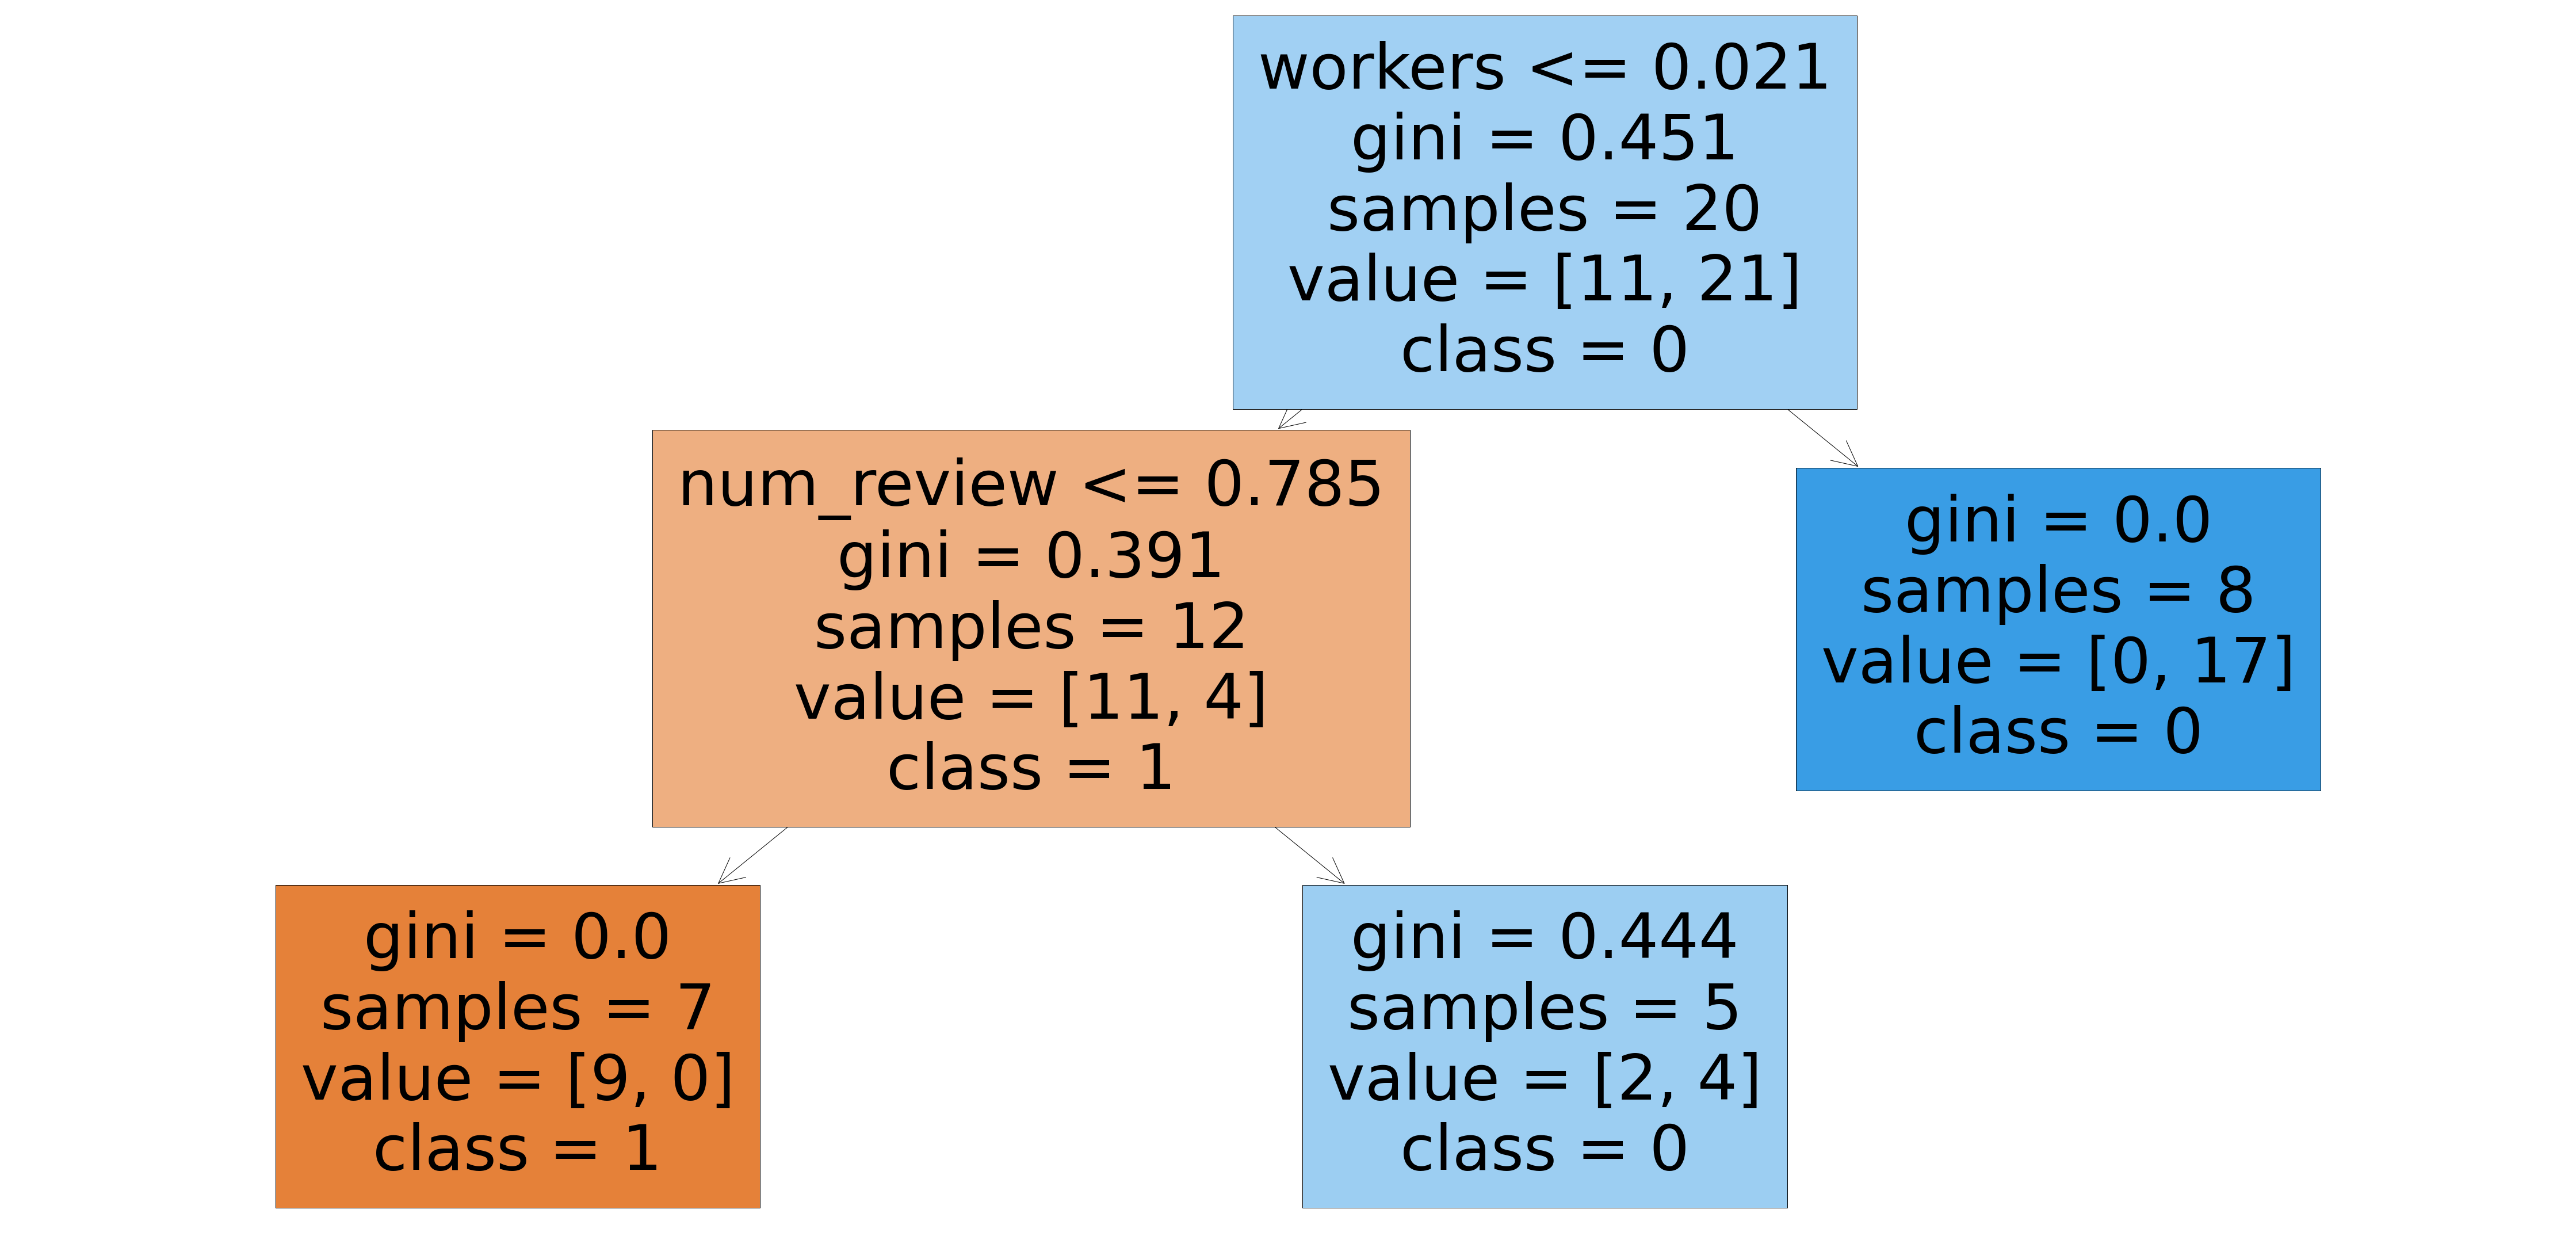

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = features.columns,class_names=['1', "0"],filled=True);

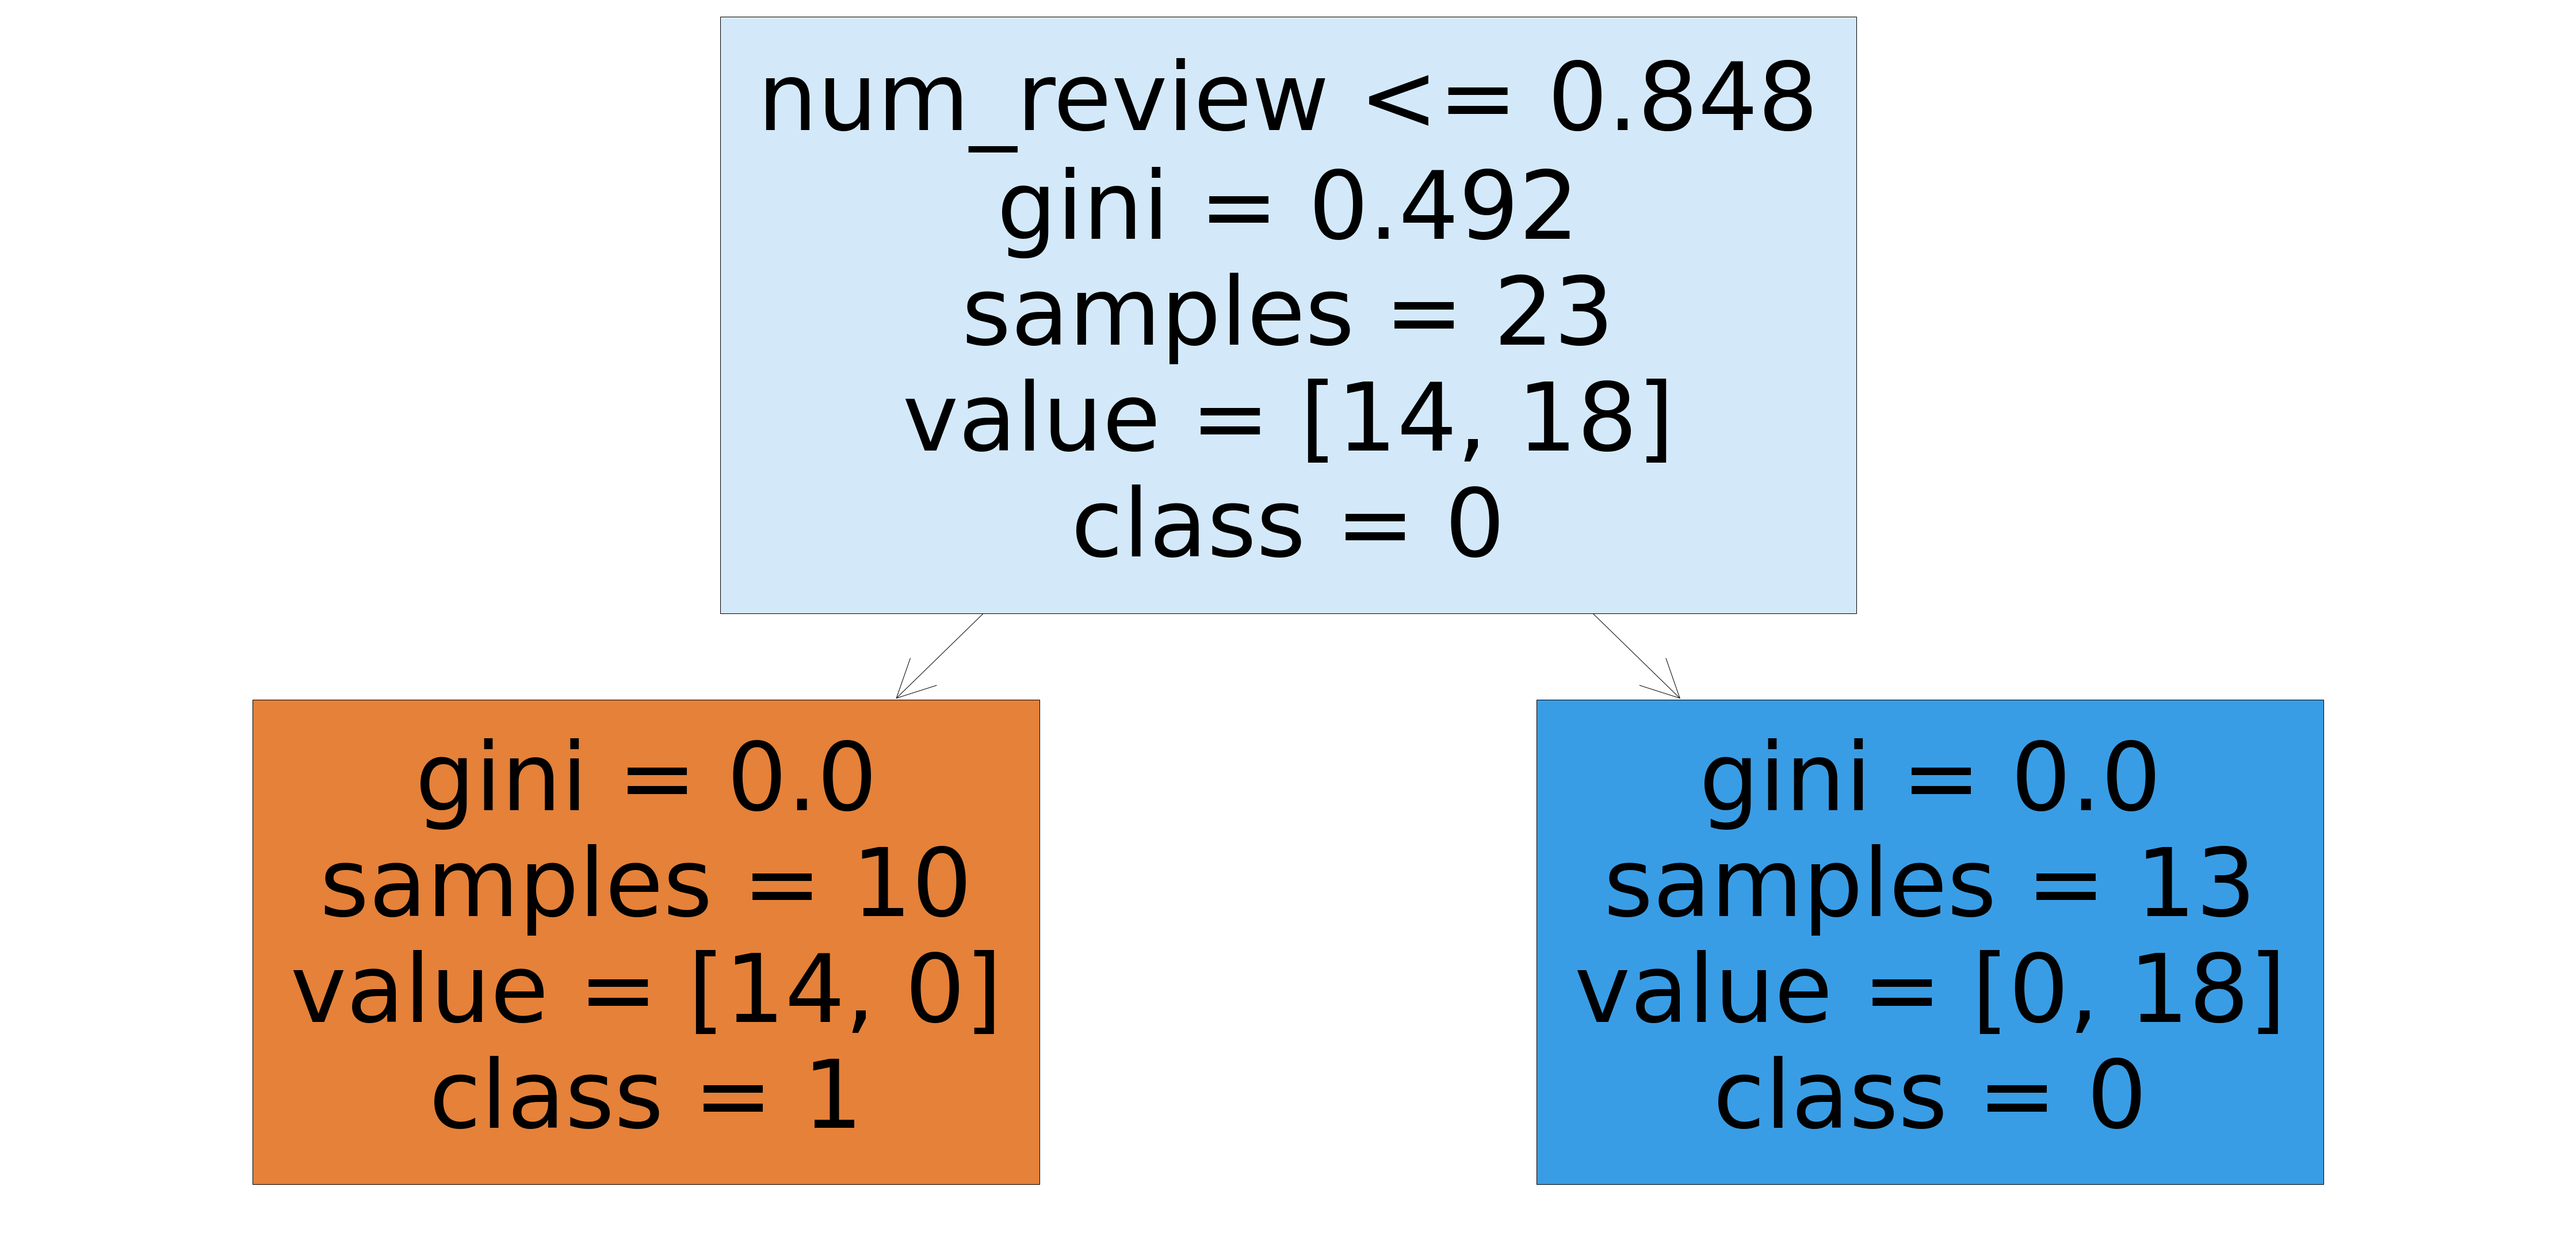

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = features.columns,class_names=['1', "0"],filled=True);


In [27]:
rf_best.feature_importances_

array([0.42718584, 0.4       , 0.00530957, 0.16750459])

In [28]:
X_train

array([[9.93527508e-01, 9.98194946e-01, 1.37973325e-02, 8.18947194e-01],
       [9.96763754e-01, 9.99097473e-01, 6.89866626e-03, 8.18957562e-01],
       [8.73786408e-01, 9.64801444e-01, 7.05196995e-02, 8.18065881e-03],
       [9.09385113e-01, 9.74729242e-01, 9.55082017e-02, 3.33343702e-02],
       [7.15210356e-01, 2.88808664e-02, 1.50237621e-02, 3.31788443e-04],
       [9.80582524e-01, 9.94584838e-01, 3.06607389e-03, 8.18905720e-01],
       [8.83495146e-01, 9.67509025e-01, 4.92718075e-01, 8.81313053e-04],
       [8.99676375e-01, 9.72021661e-01, 9.50482907e-03, 6.78092631e-03],
       [7.31391586e-01, 3.24909747e-02, 9.96474015e-03, 8.08734331e-04],
       [7.70226537e-01, 6.76895307e-02, 9.81143646e-03, 8.18065881e-03],
       [9.12621359e-01, 9.75631769e-01, 6.89866626e-03, 5.74408743e-03],
       [9.57928803e-01, 9.88267148e-01, 3.95523532e-02, 8.18833142e-01],
       [7.99352751e-01, 1.26353791e-02, 1.83964434e-03, 4.87314276e-04],
       [9.67637540e-01, 9.90974729e-01, 1.19576882e

In [29]:
imp_df = pd.DataFrame({
    "Varname": features.columns,
    "Imp": rf_best.feature_importances_
})

In [30]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,num_review,0.427186
1,num_employee,0.400000
3,workers,0.167505
2,number,0.005310
